libraries to install: yfinance, mplfinance

In [21]:
import datetime
import pandas as pd
import time
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
from telegram import Bot
import asyncio
import json
from PIL import Image
from telegram import InputFile
import nest_asyncio
nest_asyncio.apply()

In [118]:
async def sendit():
    image1 = Image.open(r'charts/test4.png')
    im1 = image1.convert('RGB')
    imagelist = [im1]
    im1.save(r'charts/test.pdf',save_all=True, append_images=imagelist)

    with open('info.json', 'r') as file:
        data = json.load(file)

    bot_token = data['telegram_bot_token']
    chat_id = data['telegram_chat_id']

    pdf_file_path = 'charts/test.pdf'
    # pdf_file_path = 'charts/test4.png'

    bot = Bot(token=bot_token)

    with open(pdf_file_path, 'rb') as pdf_file:
        await bot.send_document(chat_id=chat_id, document=InputFile(pdf_file), read_timeout=1000, write_timeout=1000, connect_timeout=1000, pool_timeout=1000)

In [117]:
loop = asyncio.get_event_loop()
# Blocking call which returns when the display_date() coroutine is done
loop.run_until_complete(sendit())
# loop.close()

In [23]:
stocks1 = pd.read_csv('scripts/dw1.csv')
stocks2 = pd.read_csv('scripts/dw2.csv')
stocks3 = pd.read_csv('scripts/dw3.csv')
stocks4 = pd.read_csv('scripts/dw4.csv')

list_stocks1 = list(stocks1['CODE'])
list_stocks2 = list(stocks2['CODE'])
list_stocks3 = list(stocks3['CODE'])
list_stocks4 = list(stocks4['CODE'])

period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max

interval: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

In [ ]:
for script in list_stocks4:
    try:
        data_hourly = yf.download(script, period="3mo", interval="1h")
    except:
        print("Hourly Error: ", script)
    try:
        data_daily = yf.download(script, period="1y", interval="1d")
    except:
        print("Daily Error: ", script)

In [24]:
data_hourly = yf.download("AIAENG.NS", period="3mo", interval="1h")
data_daily = yf.download("AIAENG.NS", period="1y", interval="1d")
data_weekly = yf.download("AIAENG.NS", period="10y", interval="1wk")
data_monthly = yf.download("AIAENG.NS", period="10y", interval="1mo")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [121]:
# final for daily
save = dict(fname="charts/test4.png", dpi=1000, pad_inches=0.25)
figsize = (9.4,5)
# figsize_info = f"Figsize: {figsize[0]}x{figsize[1]}"
s = mpf.make_mpf_style(base_mpf_style='yahoo', edgecolor='white', gridcolor='white',
                        facecolor='white', figcolor='white', gridstyle='',gridaxis='vertical')
mpf.plot(data_daily, type='candle', title=f"AIAENG - Daily", style=s, figscale = 1.0, 
         figratio = (1, 0.3), volume=True, datetime_format='%b-%y', savefig=save, figsize=figsize,
         xrotation=0)

loop = asyncio.get_event_loop()
# Blocking call which returns when the display_date() coroutine is done
loop.run_until_complete(sendit())
# loop.close()

In [132]:
# final for hourly
save = dict(fname="charts/test4.png", dpi=1000, pad_inches=0.25)
figsize = (10,3)
figratio = (1, 0.2)
figscale = 0.5
# figsize_info = f"Figsize: {figsize[0]}x{figsize[1]}"
s = mpf.make_mpf_style(base_mpf_style='yahoo', edgecolor='white', gridcolor='white',
                        facecolor='white', figcolor='white', gridstyle='',gridaxis='vertical')
mpf.plot(data_hourly, type='candle', title=f"\nAIAENG - Hourly", style=s, 
         figscale = figscale, figratio = figratio, datetime_format='%b-%y',
         xrotation=0, savefig=save, figsize=figsize)

loop = asyncio.get_event_loop()
# Blocking call which returns when the display_date() coroutine is done
loop.run_until_complete(sendit())
# loop.close()

In [125]:
save = dict(fname="charts/test4.png", dpi=1000, pad_inches=0.25)
figsize = (10,3)
figratio = (1, 0.2)
figscale = 0.5
figsize_info = f"Figsize: {figsize[0]}x{figsize[1]}"
figratio_info = f"Figratio: {figratio[0]}x{figratio[1]}"
figscale_info = f"Figscale: {figscale}"
s = mpf.make_mpf_style(base_mpf_style='yahoo', edgecolor='white', gridcolor='white',
                        facecolor='white', figcolor='white', gridstyle='',gridaxis='vertical')
mpf.plot(data_hourly, type='candle', title=f"{figsize_info, figratio_info, figscale_info}", style=s, 
         figscale = figscale, figratio = figratio, datetime_format='%b-%y',
         xrotation=0, savefig=save, figsize=figsize)

loop = asyncio.get_event_loop()
# Blocking call which returns when the display_date() coroutine is done
loop.run_until_complete(sendit())
# loop.close()

In [179]:
from PIL import Image
image1 = Image.open(r'charts/test4.png')
# image2 = Image.open(r'charts/test4.png')
# image3 = Image.open(r'test2.png')

im1 = image1.convert('RGB')
# im3 = image3.convert('RGB')

imagelist = [im1]

im1.save(r'charts/test.pdf',save_all=True, append_images=imagelist)

from telegram import Bot
from telegram import InputFile
import json

with open('info.json', 'r') as file:
    data = json.load(file)

bot_token = data['telegram_bot_token']
chat_id = data['telegram_chat_id']

pdf_file_path = 'charts/test.pdf'

bot = Bot(token=bot_token)
timeout_seconds = 60


with open(pdf_file_path, 'rb') as pdf_file:
    await bot.send_document(chat_id=chat_id, document=InputFile(pdf_file),
                            read_timeout=1000, write_timeout=1000, connect_timeout=1000, pool_timeout=1000)

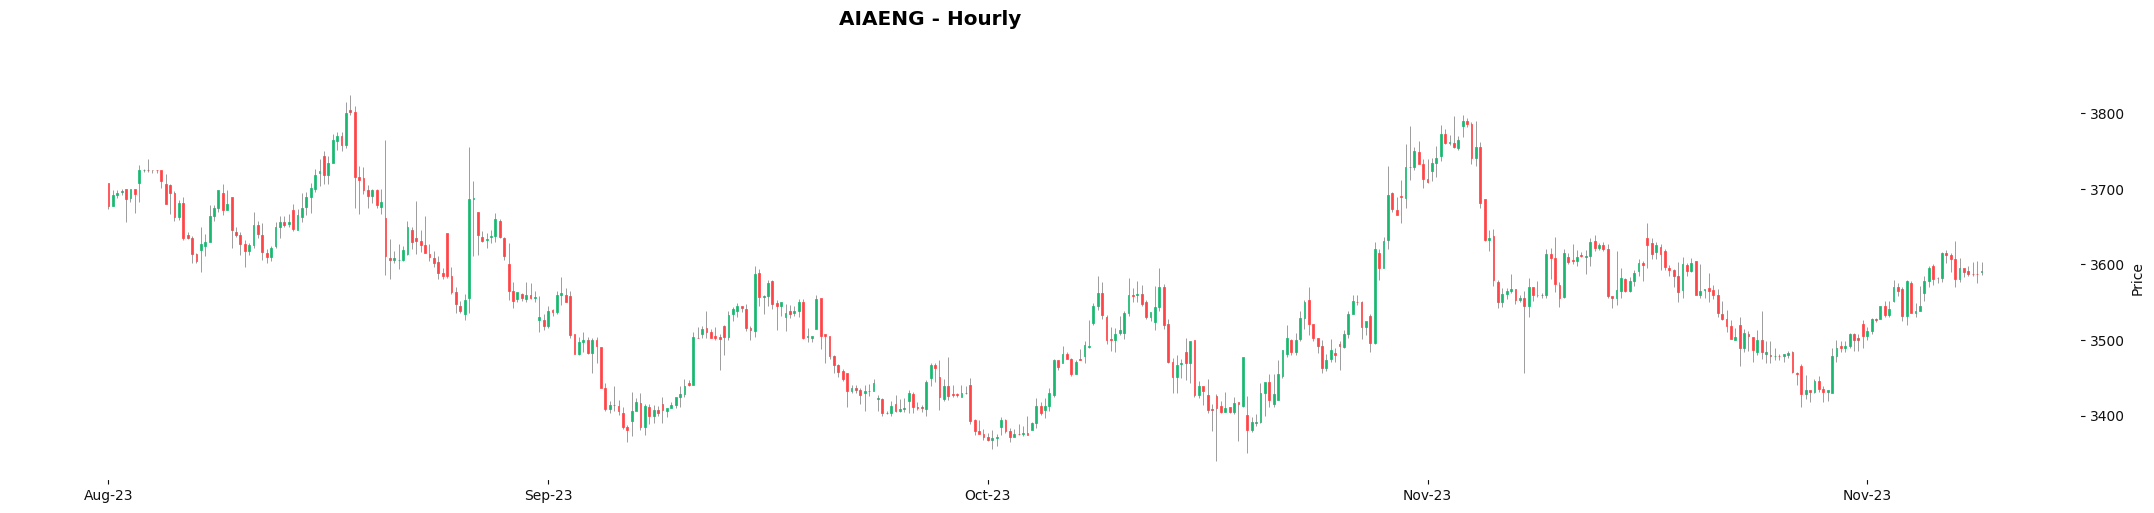

In [34]:
# save = dict(fname="charts/test4.png", dpi=1000, pad_inches=0.25)
# figsize = (9.4,5)
# figsize_info = f"Figsize: {figsize[0]}x{figsize[1]}"
s = mpf.make_mpf_style(base_mpf_style='yahoo', edgecolor='white', gridcolor='white',
                        facecolor='white', figcolor='white', gridstyle='',gridaxis='vertical')
mpf.plot(data_hourly, type='candle', title=f"AIAENG - Hourly", style=s, figscale = 1, 
         figratio = (1, 0.2), datetime_format='%b-%y',
         xrotation=0)

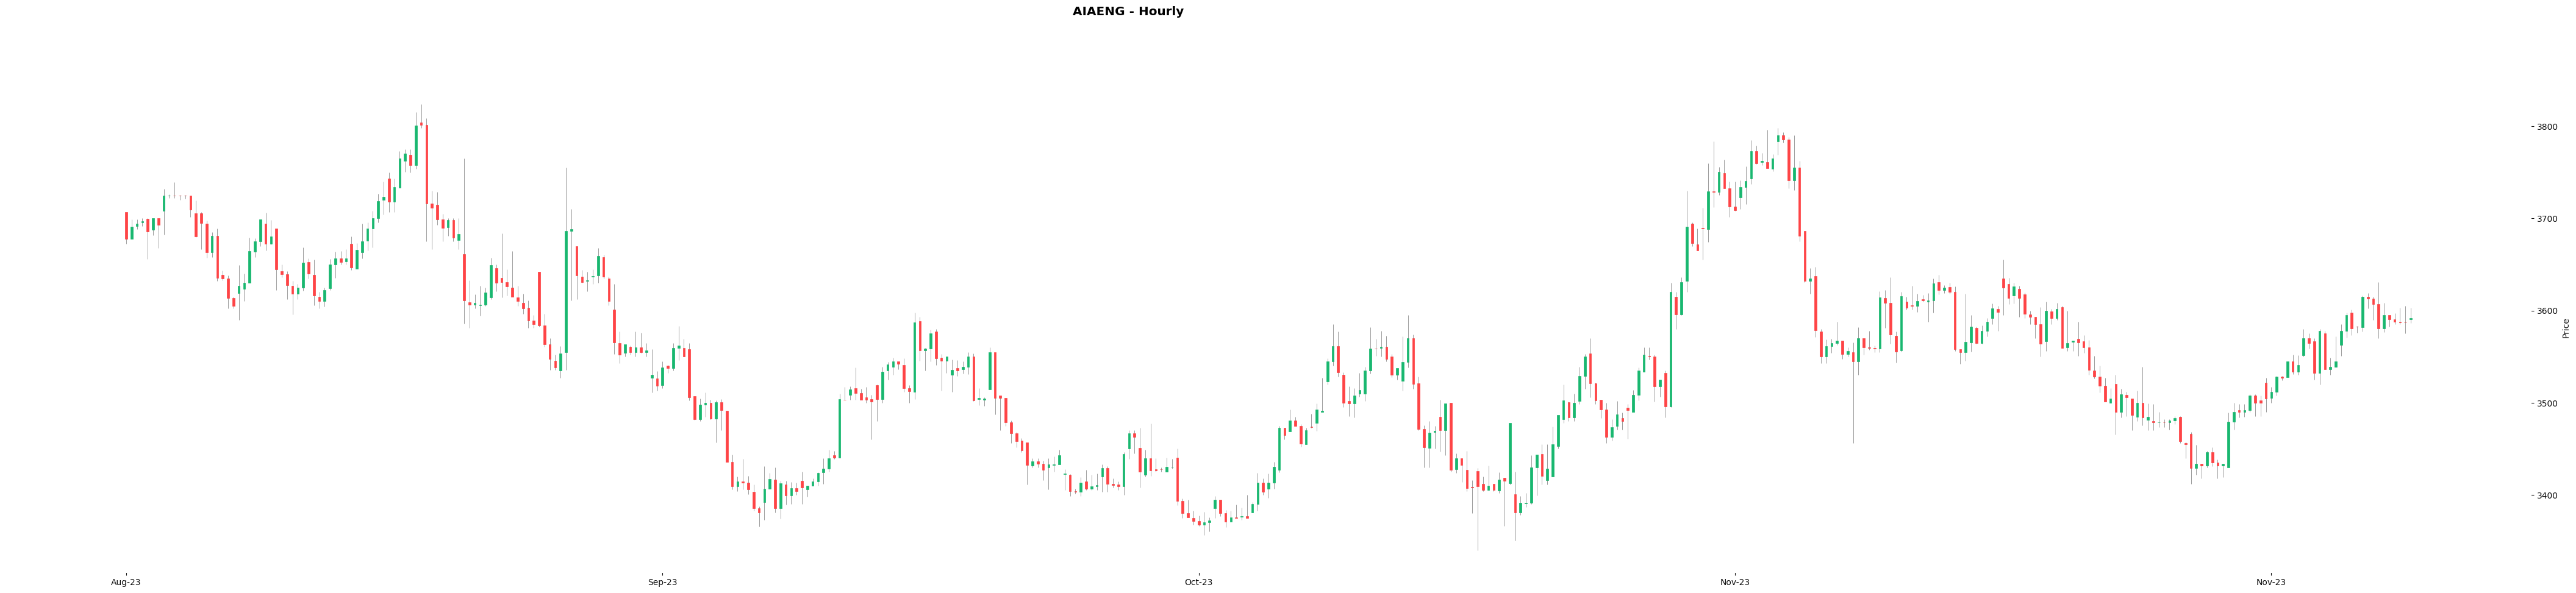

In [36]:
# save = dict(fname="charts/test4.png", dpi=1000, pad_inches=0.25)
# figsize = (9.4,5)
# figsize_info = f"Figsize: {figsize[0]}x{figsize[1]}"
s = mpf.make_mpf_style(base_mpf_style='yahoo', edgecolor='white', gridcolor='white',
                        facecolor='white', figcolor='white', gridstyle='',gridaxis='vertical')
mpf.plot(data_hourly, type='candle', title=f"AIAENG - Hourly", style=s, figscale = 2, 
         figratio = (1, 0.2), datetime_format='%b-%y',
         xrotation=0)

In [163]:
from PIL import Image
image1 = Image.open(r'charts/test4.png')
# image2 = Image.open(r'charts/test4.png')
# image3 = Image.open(r'test2.png')

im1 = image1.convert('RGB')
# im3 = image3.convert('RGB')

imagelist = [im1,im1]

im1.save(r'charts/test.pdf',save_all=True, append_images=imagelist)

from telegram import Bot
from telegram import InputFile
import json

with open('info.json', 'r') as file:
    data = json.load(file)

bot_token = data['telegram_bot_token']
chat_id = data['telegram_chat_id']

pdf_file_path = 'charts/test.pdf'

bot = Bot(token=bot_token)
timeout_seconds = 60


with open(pdf_file_path, 'rb') as pdf_file:
    await bot.send_document(chat_id=chat_id, document=InputFile(pdf_file),
                            read_timeout=1000, write_timeout=1000, connect_timeout=1000, pool_timeout=1000)

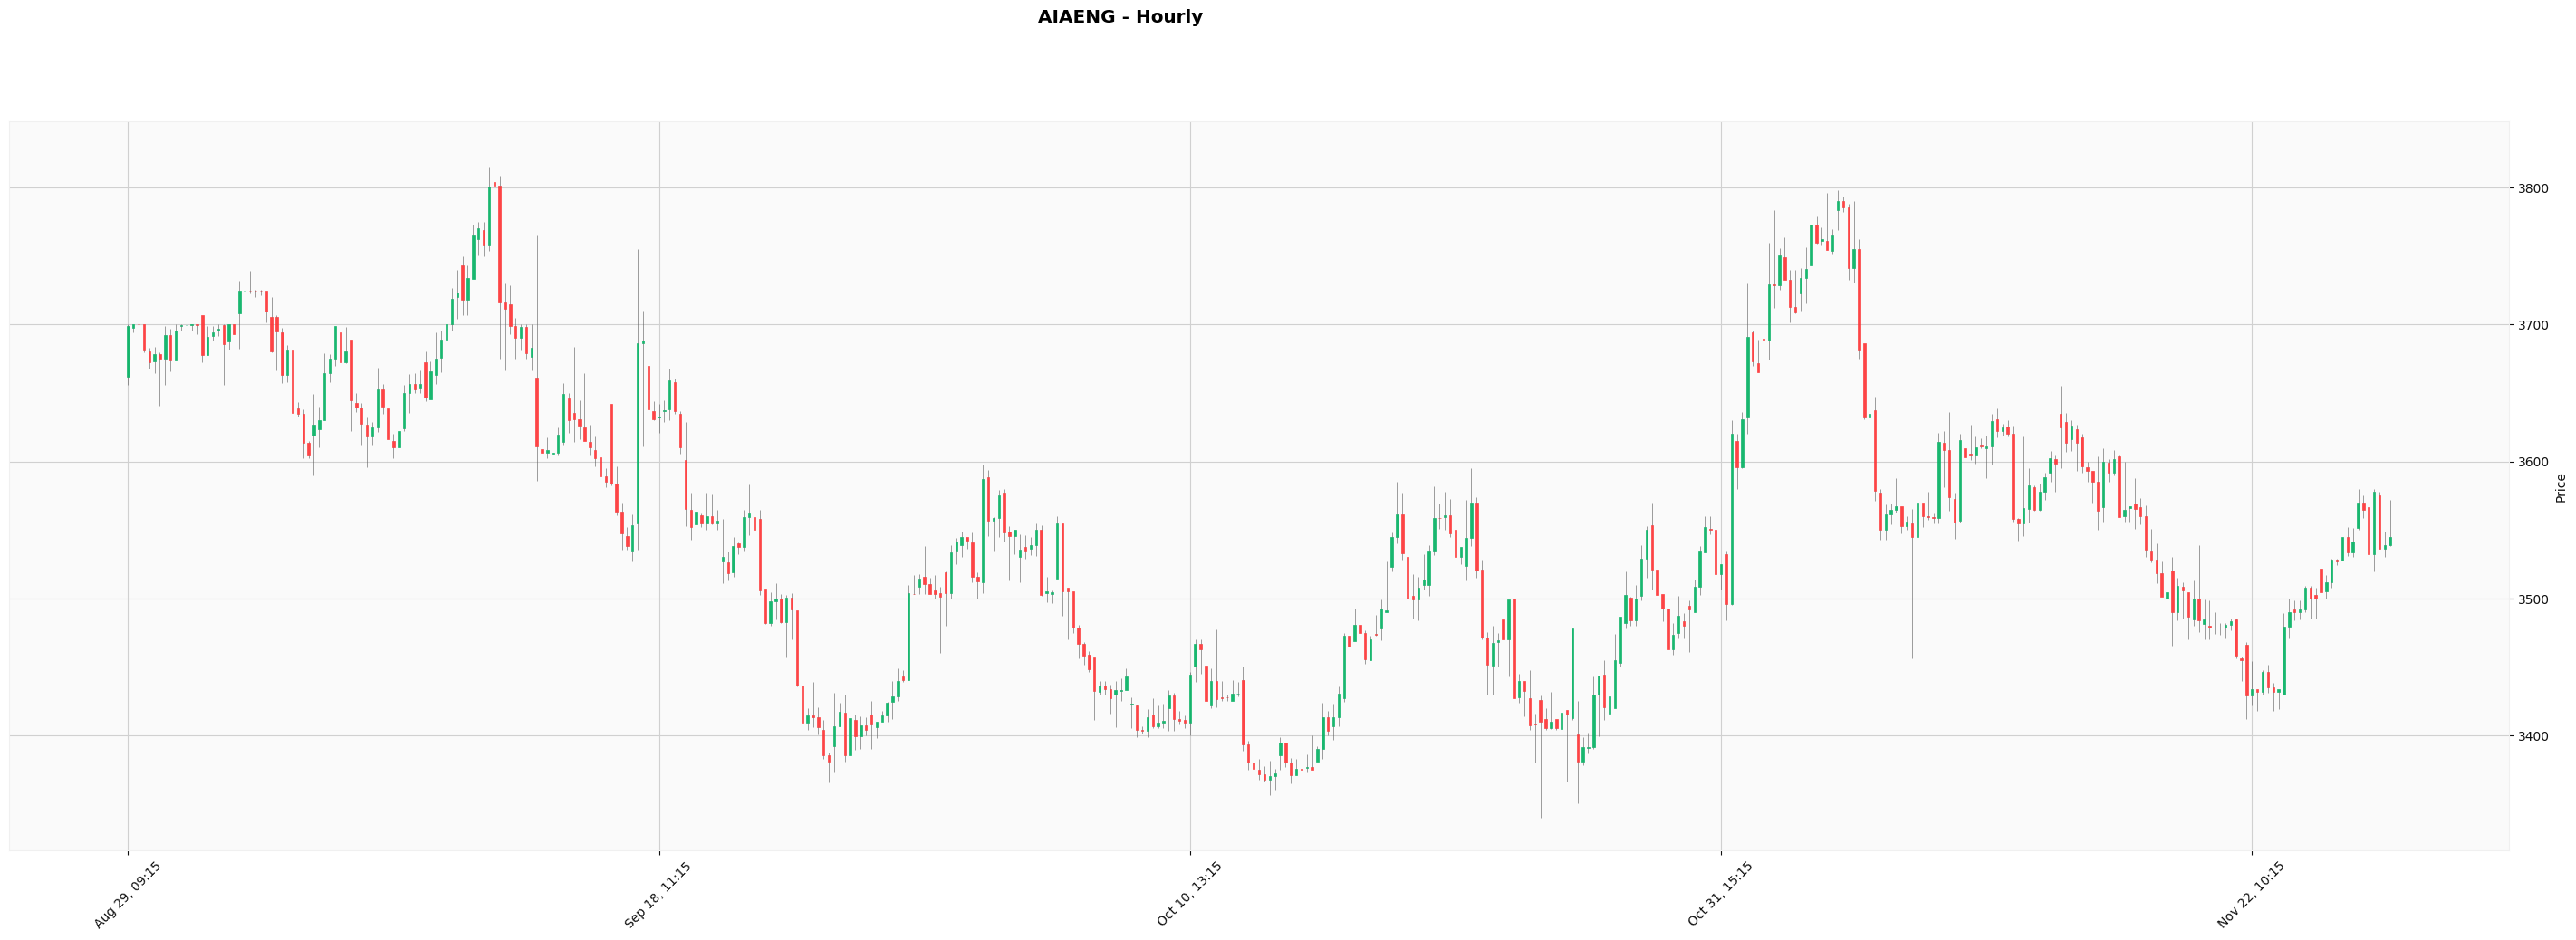

In [26]:
mpf.plot(data_hourly, type='candle', title="AIAENG - Hourly", style='yahoo', figscale = 2.0, figratio = (1, 0.3))

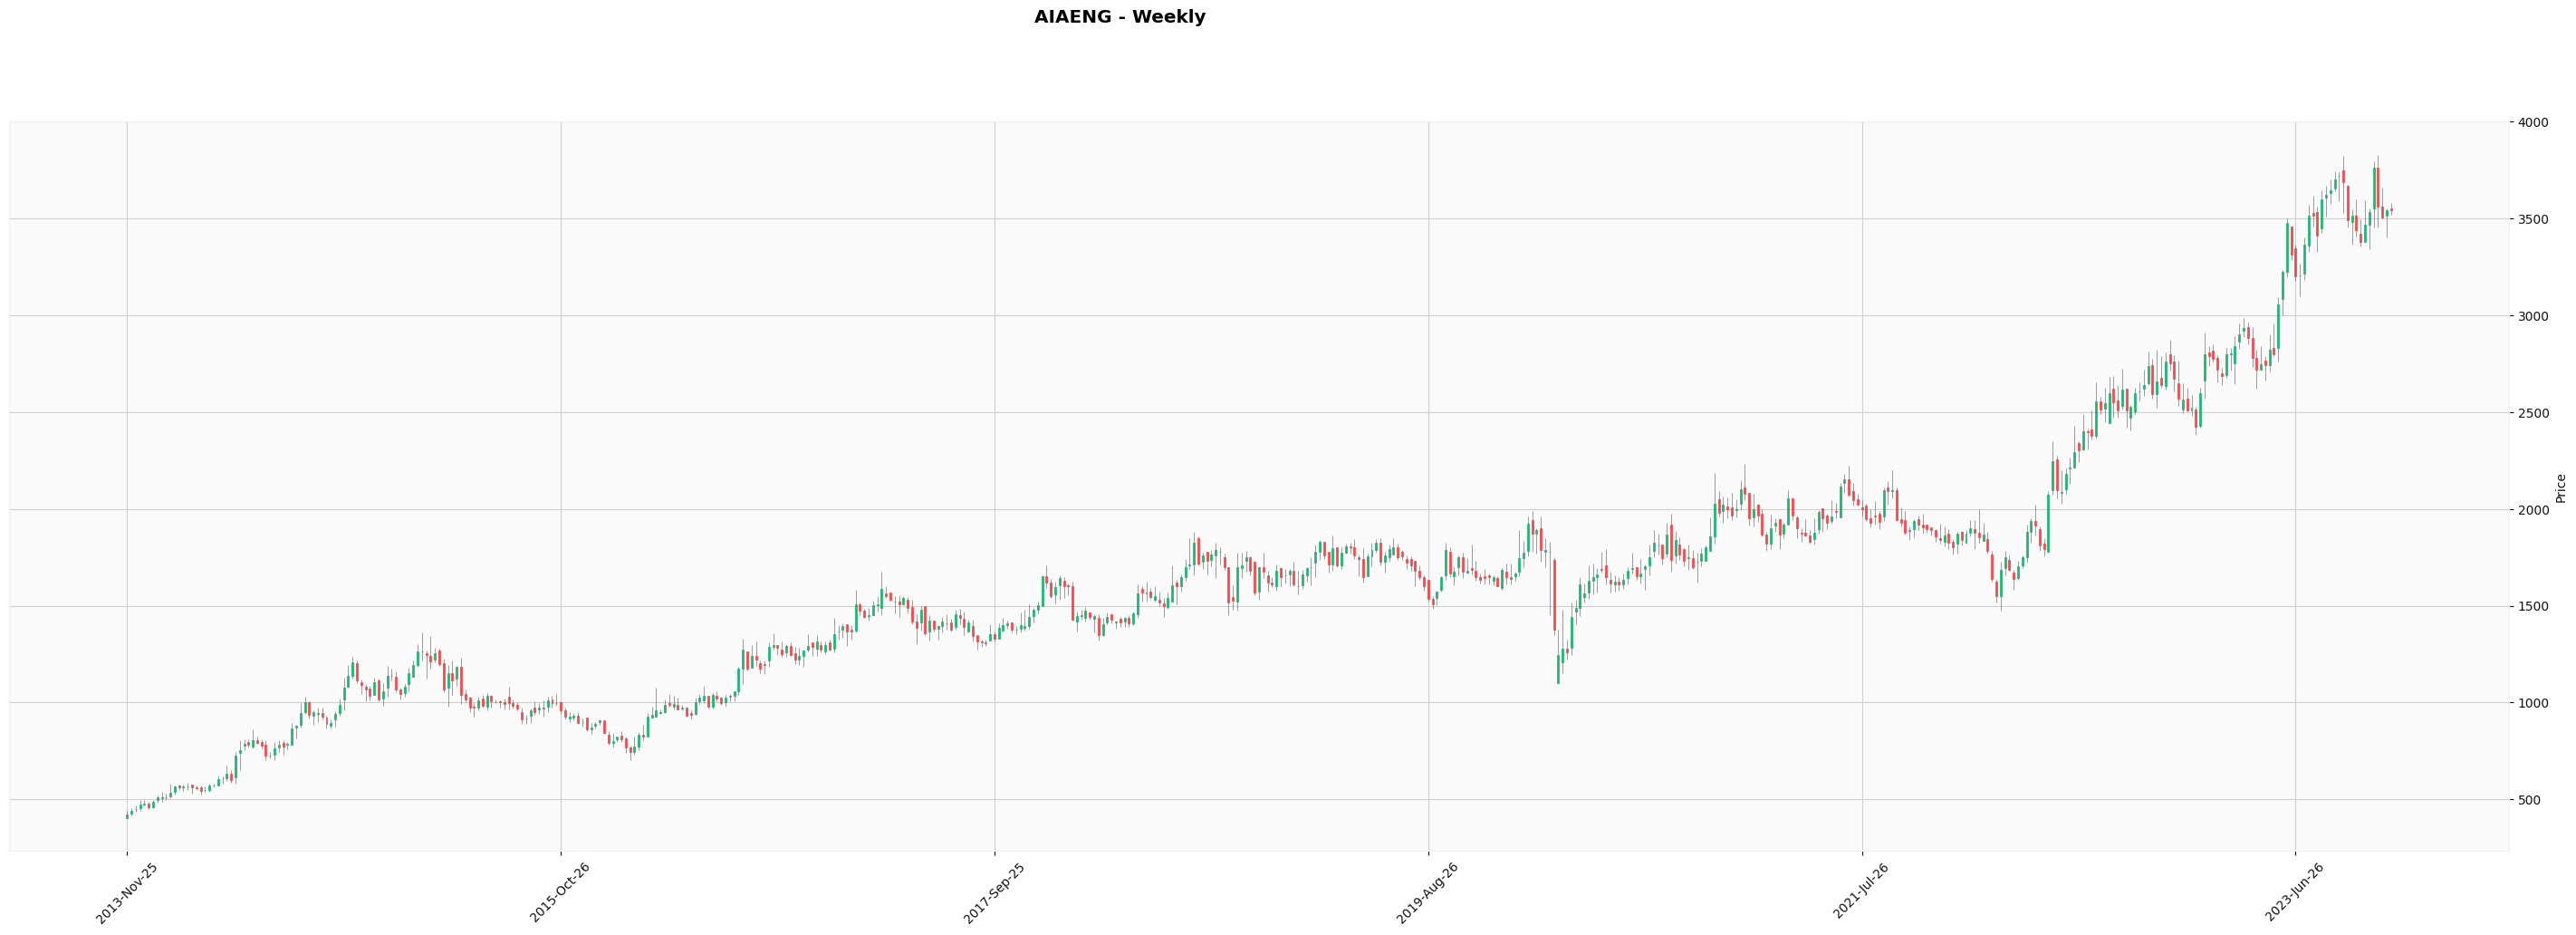

In [27]:
mpf.plot(data_weekly, type='candle', title="AIAENG - Weekly", style='yahoo', figscale = 2.0, figratio = (1, 0.3))

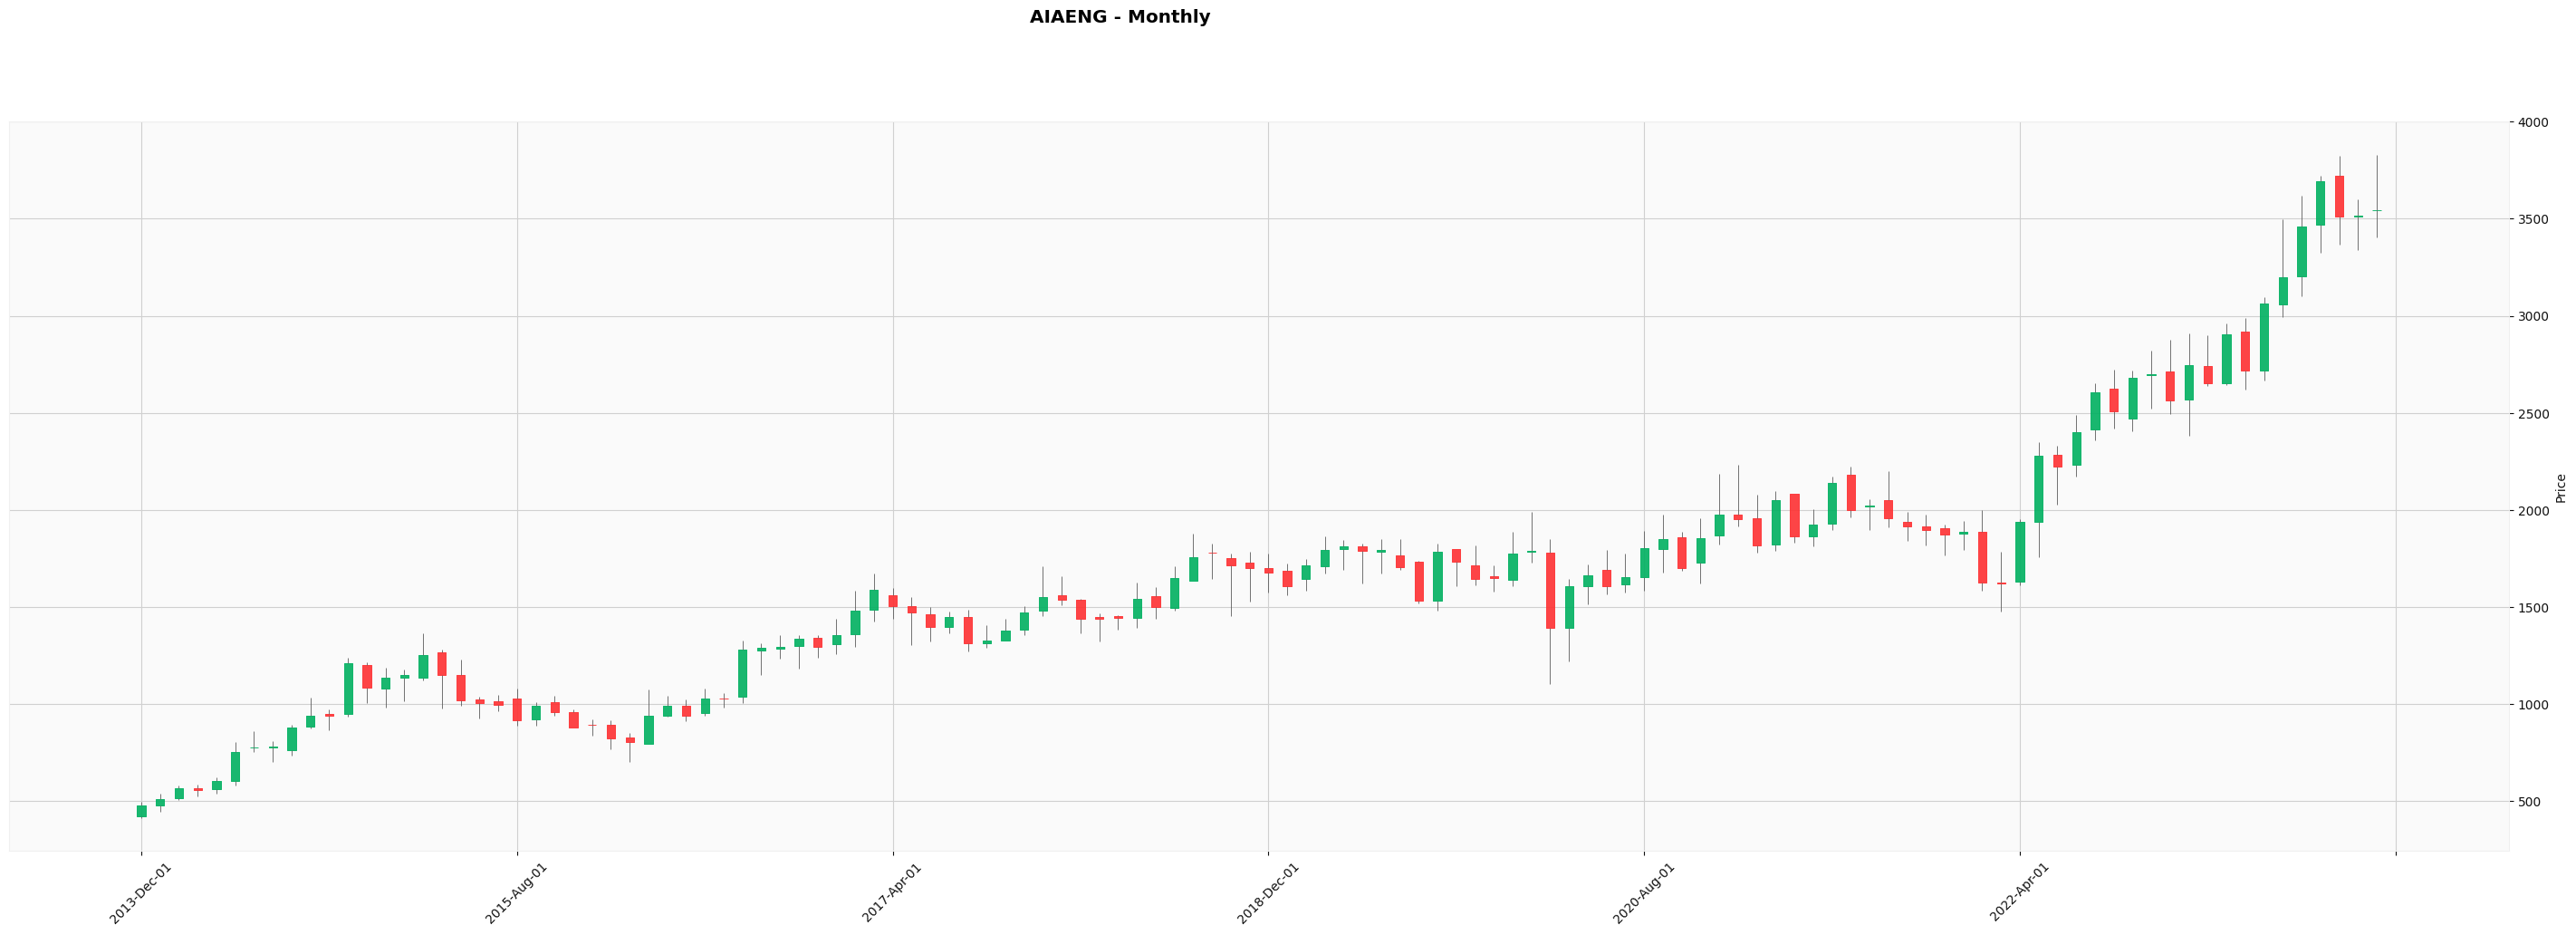

In [28]:
mpf.plot(data_monthly, type='candle', title="AIAENG - Monthly", style='yahoo', figscale = 2.0, figratio = (1, 0.3))

now combine two images into a pdf and send it over telegram

In [35]:
from PIL import Image

In [49]:
image1 = Image.open(r'test.png')
image2 = Image.open(r'test1.png')
image3 = Image.open(r'test2.png')

im1 = image1.convert('RGB')
im2 = image2.convert('RGB')
im3 = image3.convert('RGB')

imagelist = [im2,im3,im2,im3,im2,im3,im2,im3,im2,im3,im2,im3]

In [50]:
im1.save(r'test.pdf',save_all=True, append_images=imagelist)

In [51]:
from telegram import Bot
from telegram import InputFile
import json

In [52]:
with open('info.json', 'r') as file:
    data = json.load(file)

In [53]:
bot_token = data['telegram_bot_token']
chat_id = data['telegram_chat_id']

pdf_file_path = 'test.pdf'

In [54]:
bot = Bot(token=bot_token)

In [58]:
with open(pdf_file_path, 'rb') as pdf_file:
    await bot.send_document(chat_id=chat_id, document=InputFile(pdf_file))